# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `numba` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

# Question 1 (30 points)

![](points-on-line.png)

1. We monitor server faults in a data center over a period of T units of time and represents each occurring fault as a point on the line. What is the probability that k faults take place between $t_1$ and $t_2$ if $n$ total points were recorded ?  (10 points)

2. We collected a very large set of faults $n \rightarrow \infty$ over a long measurement interval $T \rightarrow \infty$  and we observed that on average faults occur with a rate of $\lambda = \frac{n}{T}$.   This [allows us](https://en.wikipedia.org/wiki/Poisson_limit_theorem) to model the probability of $k_a$ points in an interval $t_a$ as [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution).  
    Suppose that we measure $k_a$ and $k_b$ faults in two consecutive intervals of durations $t_a=(t_1, t_2)$ and $t_b=(t_2, t_3)$ respectively where $t_a+t_b < T$, write the expression of the joint probability $p(k_a \in t_a, k_b \in t_b)$. (10 points)

3. Suppose now that we need to schedule personnel to replace these servers and we are interested to use the fault data to estimate the probability of $p(k_a \in t_a | k_c \in t_c)$ where $t_c=t_a + t_b$. Write the expression of this conditional probability.  (10 points)

`Write your answer here and use Latex math notation for math. If you prefer write the math with pencil and scan the writeup in a png image that you can insert here using` 

```
![](your-png-file.png)
```

1. The probability of an a fault occuring in between $t_1$ and $t_2$ is $\frac{t_2-t_1}{T}$. Therefore $p=\frac{t_2-t_1}{T}$.
Then, the probability of seeing $k$ out of $n$ faults in between $t_1$ and $t_2$ is $\binom{n}{k}p^k (1-p)^{n-k}$.

2. Given that the time intervals do not overlap, the two events $k_a \in t_a$ and $k_b \in t_b$ are independent. Therefore the joint probability is the product of the two probabilities. Therefore, $p(k_a \in t_a, k_b \in t_b)=p(k_a \in t_a) \times p(k_b \in t_b)=e^{-\lambda t_a} \frac{(\lambda t_a)^{k_a}}{k_a!} \times e^{-\lambda t_b} \frac{(\lambda t_b)^{k_b}}{k_b!}=e^{-\lambda(t_a+t_b)} \frac{(\lambda t_a)^{k_a}(\lambda t_b)^{k_b}}{k_a!k_b!}$ 

3. Since $t_c=t_a+t_b$, it must be that $k_c=k_a+k_b$. Hence, $p(k_a \in t_a, k_c \in t_c)=p(k_a \in t_a, k_b \in t_b)$ and $p(k_c \in t_c)=p((k_a + k_b) \in (t_a + t_b))$. Therefore, by Bayes Rule, $p(k_a \in t_a | k_c \in t_c)=\frac{p(k_a \in t_a, k_c \in t_c)}{p(k_c \in t_c)}=\frac{p(k_a \in t_a, k_b \in t_b)}{p(k_c \in t_c)}=\frac{p(k_a \in t_a, k_b \in t_b)}{p((k_a + k_b) \in (t_a + t_b))}=\frac{(k_a + k_b)!}{k_a!k_b!} \frac{(\lambda t_a)^{k_a}(\lambda t_b)^{k_b}}{[\lambda(t_a + t_b)]^{(k_a + k_b)}}$






## Question 2 (10 points)

Generate N uniform distributed over the interval [0,1] random variables $\{x_1, \dots x_N\}$. 

Compute their mean and after repeating such computation $m$ times, plot the  histogram as $N$ takes values ${1, 5, 10, 20}$. 

Provide a justification of the resultant histogram by reading about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). 

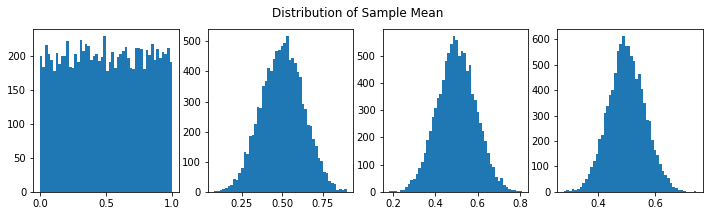

In [ ]:
# Type the Python code here
import numpy as np
import matplotlib.pyplot as plt

N = [1, 5, 10, 20]
m = 10000
means = np.zeros(shape=(len(N), m))


for i, n_samples in enumerate(N):
    for j in range(m):
        samples = np.random.rand(n_samples)
        mean = np.mean(samples)
        means[i,j] = mean

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle('Distribution of Sample Mean')

for i, trials in enumerate(means):
    axs[i].hist(trials, bins=50)

Answer: As can be seen by the histograms, which was done using m=10000 sampling iterations, the distribution of the mean of N i.i.d random variables, converges toward a standard normal distribution as N increases.

## Question 2 (10 points) 

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

Simulate and plot the bivariate normal distribution with the shown parameters. 

You need to use the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 

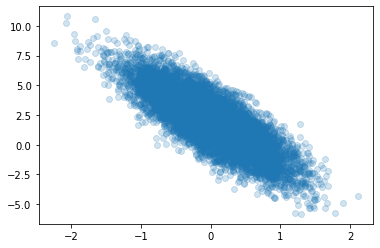

In [ ]:
degree = 2
sample_size = 10000
standard_samples = np.random.multivariate_normal(np.zeros(shape=degree), np.identity(degree), size=sample_size)
updated_samples = np.zeros(shape=standard_samples.shape)

Sigma = np.array([[0.3, -1],
                  [-1,   5]])
mu = np.array([0, 2])
A = np.linalg.cholesky(Sigma)

for i, sample in enumerate(standard_samples):
    updated_samples[i, :] = A.dot(sample) + mu

plt.scatter(updated_samples[:, 0], updated_samples[:, 1], alpha=0.2)

## Question 3 (25 points)

The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf). 

1. Simulate for $m=10, 100, 1000$ samples and plot the conditional distribution as given by the analytical expressions of the conditional mean and covariance matrix in Python. (5 points)
   
2. Use maximum likelihood estimation (MLE) with Stochastic Gradient Descent (SGD) to estimate the parameters of resultant distribution. (15 points)

3. Plot the estimates as a function of $m$ - include the analytical mean and variance in the plots for comparison.  (5 points)

You may use [these](http://jrmeyer.github.io/machinelearning/2017/08/18/mle.html) derivatives for implementing the SGD-based estimator. 



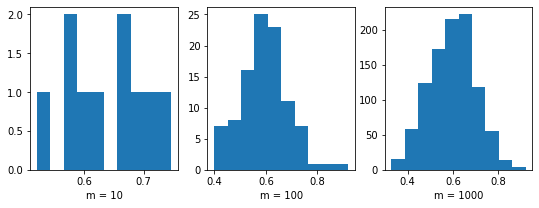

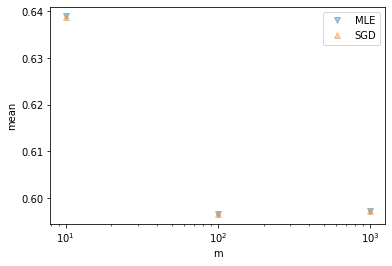

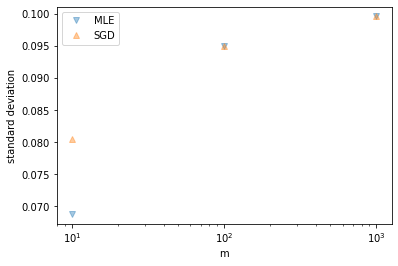

In [ ]:
# Type the Python code here

# Part 1
m = [10, 100, 1000]
samples_list = []
means = []
stds = []

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for i, n_samples in enumerate(m):
    samples = np.random.normal(loc=0.6, scale=0.1, size=n_samples)
    axs[i].hist(samples)
    axs[i].set_xlabel('m = ' + str(m[i]))
    samples_list.append(samples)
    means.append(np.mean(samples))
    stds.append(np.std(samples))
plt.show()

# Part 2
# The Maximum Likelihood Estimators for the mean and variance of a standard normal distribution 
# are analytically equivalent to the sample mean and the sample variance.
# (calculated in the for-loop)

# Gradient Descent
mu = 0.0
sigma = 1.0

epochs = 10000
learning_rate = 1e-4

sgd_means = []
sgd_stds = []


for samples in samples_list:
    for epoch in range(epochs):
        dmu = -(1/(sigma**2)) * (np.sum(samples) - len(samples)*mu)
        mu = mu - learning_rate * dmu
    sgd_means.append(mu)

epochs = int(1e6)
learning_rate = 1e-6

for samples in samples_list:
    for epoch in range(epochs):
        dsigma = -(1/((2*sigma)**2)) * ((1/(sigma**2)) * np.sum( (samples - mu)**2 ) - len(samples))
        sigma = sigma - learning_rate * dsigma
    sgd_stds.append(sigma)

plt.semilogx(m, means, 'v', alpha=0.4, label='MLE')
plt.semilogx(m, sgd_means, '^', alpha=0.4, label='SGD')
plt.xlabel('m')
plt.ylabel('mean')
plt.legend()
plt.show()

plt.semilogx(m, stds, 'v', alpha=0.4, label='MLE')
plt.semilogx(m, sgd_stds, '^', alpha=0.4, label='SGD')
plt.xlabel('m')
plt.ylabel('standard deviation')
plt.legend()
plt.show()